<a href="https://colab.research.google.com/github/onurozansunger/first_data_mining_practice/blob/main/data_mining_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [112]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)

In [118]:
raw_data=pd.read_csv("/content/StudentsPerformance.csv")

In [119]:
df=raw_data.copy()

In [120]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [121]:
statistic=df.describe().T

In [123]:
statistic["mean"]["math score"]

66.089

In [82]:
statistic["25%"]["reading score"]

59.0

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [84]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

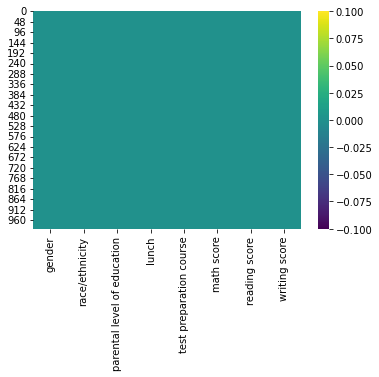

In [85]:
sns.heatmap(df.isnull(), cbar=True, cmap="viridis")

In [86]:
df["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [87]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score'], dtype='object')

In [88]:
df=df.drop(["race/ethnicity","lunch","test preparation course"],axis=1)

In [89]:
df.head()

,gender,parental level of education,math score,reading score,writing score
0,female,bachelor's degree,72,72,74
1,female,some college,69,90,88
2,female,master's degree,90,95,93
3,male,associate's degree,47,57,44
4,male,some college,76,78,75


In [90]:
df.isnull().sum()

gender                         0
parental level of education    0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [91]:
df.dropna(inplace=True)

In [92]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   parental level of education  1000 non-null   object
 2   math score                   1000 non-null   int64 
 3   reading score                1000 non-null   int64 
 4   writing score                1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [93]:
df.isnull().sum()

gender                         0
parental level of education    0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [94]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [95]:
duplicate=df[df.duplicated()]

In [96]:
duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 613 to 692
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       3 non-null      object
 1   parental level of education  3 non-null      object
 2   math score                   3 non-null      int64 
 3   reading score                3 non-null      int64 
 4   writing score                3 non-null      int64 
dtypes: int64(3), object(2)
memory usage: 144.0+ bytes


In [97]:
df.gender.value_counts(normalize=True).round(2)

female    0.52
male      0.48
Name: gender, dtype: float64

In [98]:
numerical_columns=[i for i in df.columns if df[i].dtype!="O"]

In [99]:
numerical_columns

['math score', 'reading score', 'writing score']

In [100]:
categorical_columns=[i for i in df.columns if df[i].dtype=="O"]

In [101]:
categorical_columns

['gender', 'parental level of education']

In [102]:
df=df.drop(["gender"],axis=1)

In [103]:
df.head()

,parental level of education,math score,reading score,writing score
0,bachelor's degree,72,72,74
1,some college,69,90,88
2,master's degree,90,95,93
3,associate's degree,47,57,44
4,some college,76,78,75


In [124]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [125]:
statistic["25%"]["math score"]

57.0

In [128]:
statistic['std']["reading score"]

14.600191937252216

In [129]:
statistic['max']["reading score"]

100.0

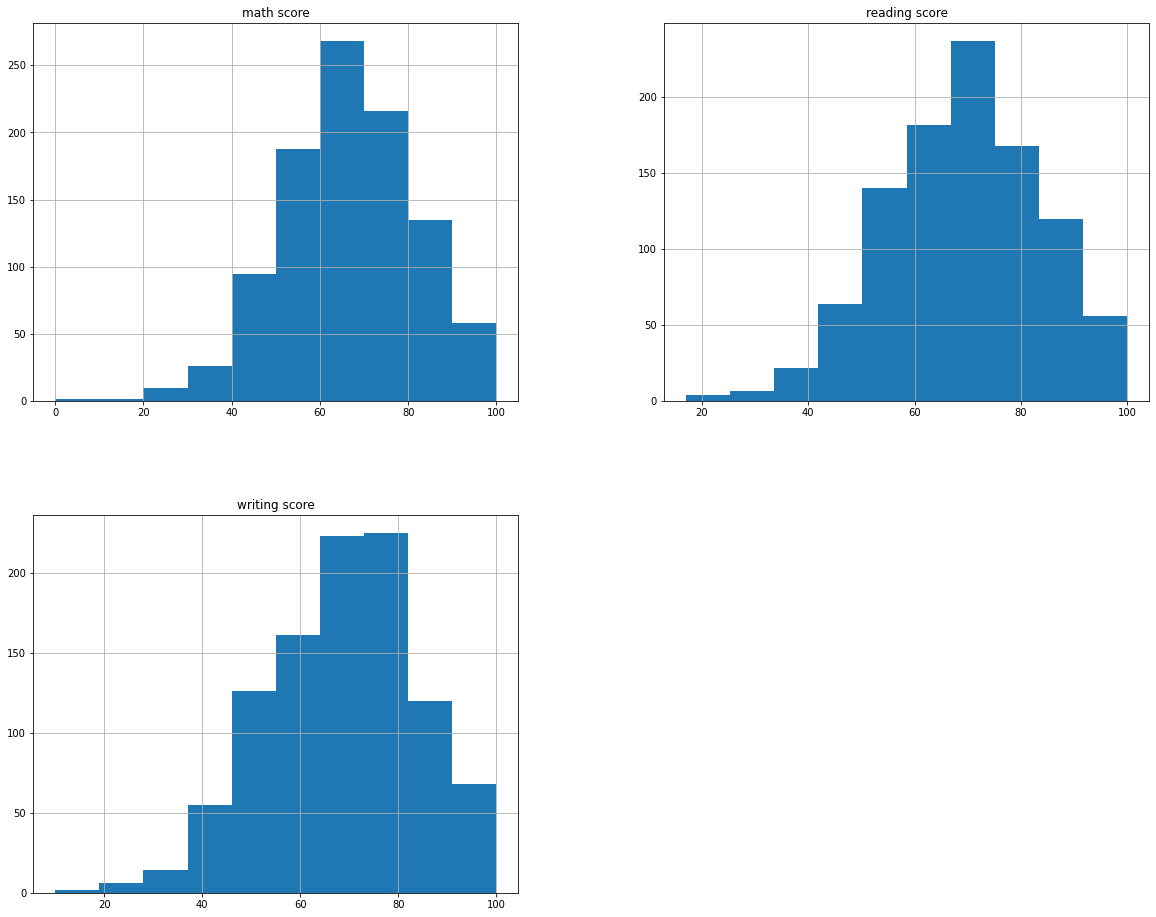

In [130]:
df.hist(bins=10, figsize=(20,16))
plt.show()

In [131]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


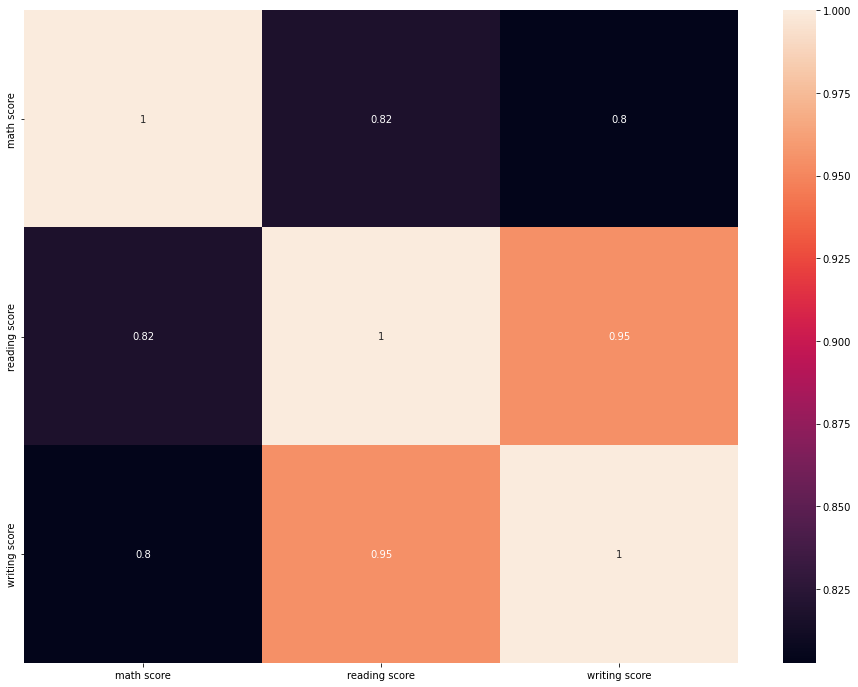

In [132]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), cbar="bwr", annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


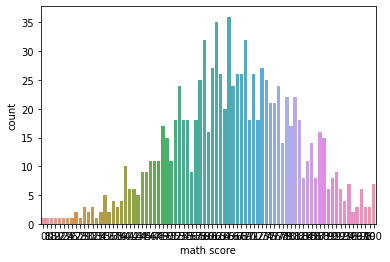

In [134]:
sns.countplot(df["math score"])

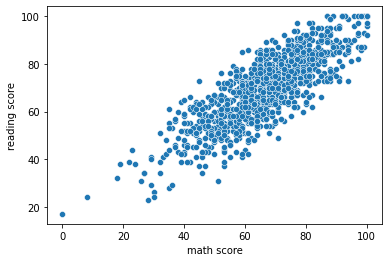

In [135]:
sns.scatterplot(data=df, x="math score", y="reading score")

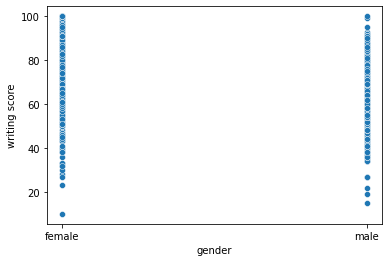

In [136]:
sns.scatterplot(data=df, x="gender", y="writing score")

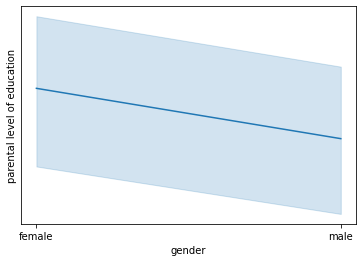

In [137]:
sns.lineplot(data=df, x="gender", y="parental level of education")

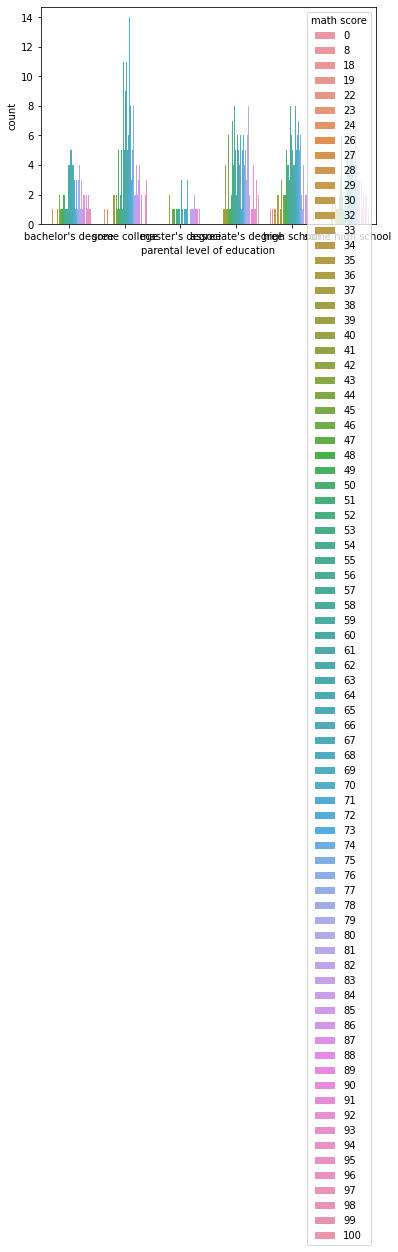

In [138]:
sns.countplot(data=df, x="parental level of education", hue="math score")

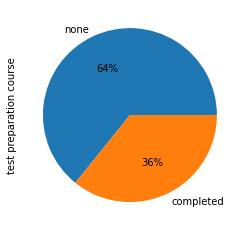

In [139]:
df["test preparation course"].value_counts(normalize=True).plot.pie(autopct="%.0f%%")